In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

In [33]:
def categorical_numerical(df, feature, target) : # 범주형 , 숫자형 변수간 검정  (t-test, Anova) / 막대그래프 시각화 / 
    
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    
    sns.barplot(x = feature, y = target, data = df)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.show()

    an_list = []
    for i in range(df[feature].nunique()) :
        an_list.append(df.loc[df[feature] == i, target])

    if len(an_list) == 2:
    # t-test
        t_stat, p_value = spst.ttest_ind(an_list[0], an_list[1])
        print(f"T-test 결과: t-statistic = {t_stat}, p-value = {p_value}")

    elif len(an_list) > 2:
    # ANOVA
        f_stat, p_value = spst.f_oneway(*an_list)
        print(f"ANOVA 결과: F-statistic = {f_stat}, p-value = {p_value}")

    else:
        print("비교할 그룹이 부족합니다.")
        
def categorical_categorical(df , feature , target): # 범주형 --> 범주형 간 검정 (카이제곱검정) / 모자이크플롯
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    mosaic(df, [ feature,target])
    #plt.axhline(1- df[target].mean(), color = 'r')
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.show()
    
    # 먼저 집계
    table = pd.crosstab(df[target], df[feature])
    print('교차표\n', table)
    print('=' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    # print('기대빈도\n',result[3])
    
    
    
def numerical_numerical(df, feature , target): # 숫자형 , 숫자형 
    # 산점도 + 회귀분석 선 표기
    
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    sns.regplot(x=feature, y = target, data = df)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.show()
    print('='*100)
    result = spst.pearsonr(df[feature], df[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')


def numerical_numerical_hitmap(df):
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    # 숫자형으로 구성된 데이터들 한해서만 상관분석 수행 
    temp = df.select_dtypes(include=['number'])
    plt.figure(figsize = (8, 8))
    # 한글 폰트 설정: 맑은 고딕
    plt.rcParams['font.family'] = 'Malgun Gothic'
    # 유니코드 마이너스 사용 설정
    plt.rcParams['axes.unicode_minus'] = False
    sns.heatmap(temp.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
    plt.show()
    
    #

In [34]:

def categorical_categorical(df , feature , target): # 범주형 --> 범주형 간 검정 (카이제곱검정) / 모자이크플롯
    mosaic(df, [ feature,target])
    #plt.axhline(1- df[target].mean(), color = 'r')
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.show()
    
    # 먼저 집계
    table = pd.crosstab(df[target], df[feature])
    print('교차표\n', table)
    print('=' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    # print('기대빈도\n',result[3])

In [35]:
def numerical_numerical(df, feature , target): # 숫자형 , 숫자형 
    # 산점도 + 회귀분석 선 표기
    sns.regplot(x=feature, y = target, data = df)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.show()
    print('='*100)
    result = spst.pearsonr(df[feature], df[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')
    

In [36]:
def numerical_numerical_hitmap(df): #
    # 숫자형으로 구성된 데이터들 한해서만 상관분석 수행 
    temp = df.select_dtypes(include=['number'])
    plt.figure(figsize = (8, 8))
    # 한글 폰트 설정: 맑은 고딕
    plt.rcParams['font.family'] = 'Malgun Gothic'
    # 유니코드 마이너스 사용 설정
    plt.rcParams['axes.unicode_minus'] = False
    sns.heatmap(temp.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
    plt.show()

# 이탈고객 여부(범주형) --> 물품 구매량, 구매수량 , 3개월간 방문 횟수(숫자형)
- T-test 검정 (Qty , Amt , Visit_3M_Cnt	,Amt_3M_sum)


In [37]:
# 데이터 불러오기
path = 'C:/Users/User/Desktop/KT Aivle/KT_AIVLE_DX_Regular_course/Week1/DX_미니프로젝트 1차_ 1일차 실습자료/cust_churn.csv' # 변동

check = pd.read_csv(path)

check.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,...,Qty,Amt,Year,Month,churn,RegDuration,Visit_3M_Cnt,Amt_3M_sum,Generation,GeneLE
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
1,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
2,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
3,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
4,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3


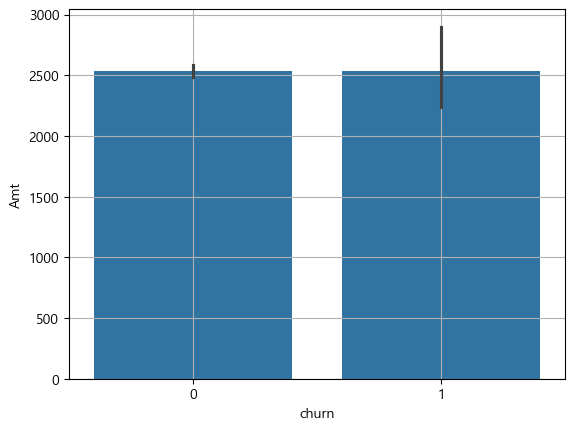

T-test 결과: t-statistic = 0.007207203698252476, p-value = 0.994249744240399


In [38]:
categorical_numerical(check , 'churn' ,'Amt') # 이탈고객과 유지고객의 구매금액에는 큰 관계가 없음

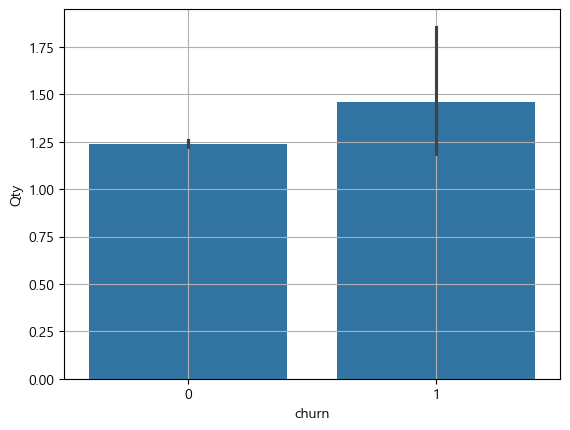

T-test 결과: t-statistic = -3.0754021222673704, p-value = 0.0021105176824918305


In [39]:
categorical_numerical(check , 'churn' ,'Qty') # 하지만 구매 수량에는 분명한 차이가 발생
# 이탈고객이 평균적으로 구매하는 양이 더 많은데 이탈한 것으로 보아 
# 대량구매 혜택이 마음에 들지 않는다던지 배송 서비스가 별로라서 이탈했음?

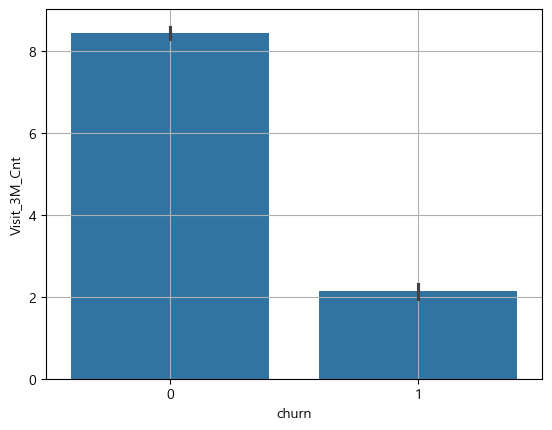

T-test 결과: t-statistic = 28.40125258752731, p-value = 8.542287306041404e-168


,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,...,Qty,Amt,Year,Month,churn,RegDuration,Visit_3M_Cnt,Amt_3M_sum,Generation,GeneLE
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
1,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
2,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
3,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
4,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3


In [40]:
check['Visit_3M_Cnt'] = check['Visit_3M_Cnt'].fillna(0)
categorical_numerical(check , 'churn' ,'Visit_3M_Cnt') # 2016-09 ~2016-12 동안 방문한 횟수  / 
# 이탈고객은 최근 3개월간 방문 횟수가 현저히 적음 
check.head()

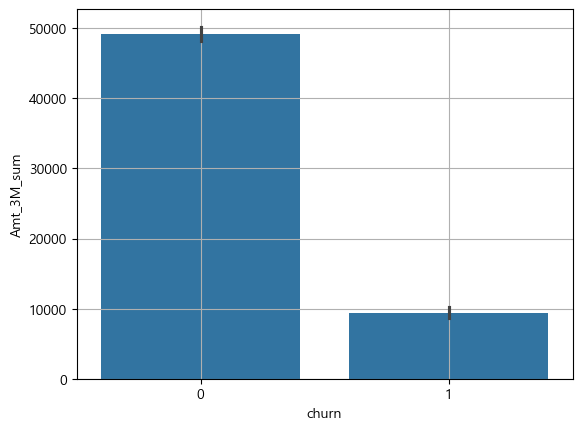

T-test 결과: t-statistic = 26.989118880936413, p-value = 1.6474131086130713e-152


In [41]:
check['Amt_3M_sum'] = check['Amt_3M_sum'].fillna(0)
categorical_numerical(check , 'churn' ,'Amt_3M_sum') # 2016-09 ~2016-12 동안 구매한 금액  / 
# 이탈고객은 최근 3개월간 구매량이 매우 적음 

# 범주형 --> 범주형( 카이제곱 검정 )   churn ->  
- Gender	Addr1	Addr2	AgeGroup		RegDuration	
- Generation	
- GeneLE

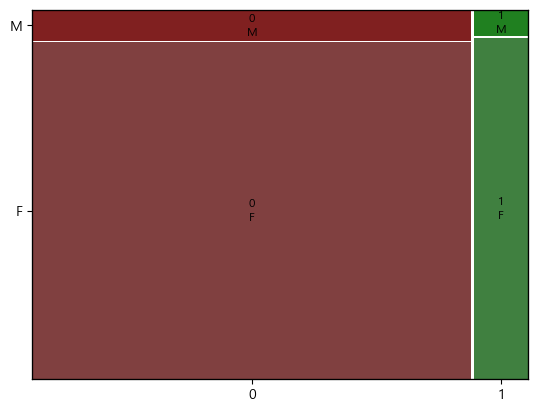

교차표
 churn      0    1
Gender           
F       5538  703
M        519   55
카이제곱통계량 1.339612152360461
p-value 0.24710237749942376
자유도 1


In [42]:
categorical_categorical(check ,'churn','Gender')
# 성별은 이탈율에 영향을 주지 않음 

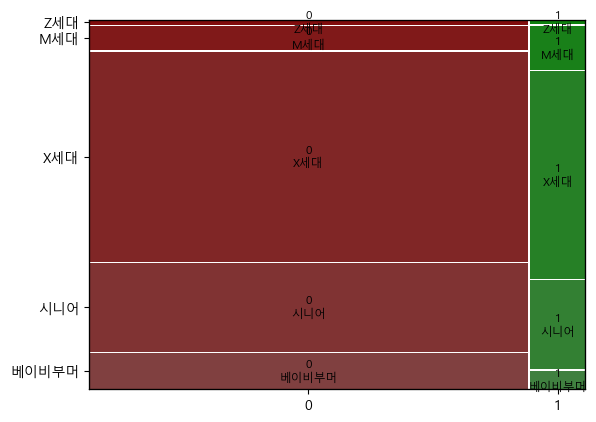

교차표
 churn          0    1
Generation           
M세대          407   92
X세대         3487  432
Z세대           84   10
베이비부머        598   39
시니어         1481  185
카이제곱통계량 43.177803715458296
p-value 9.50504487035504e-09
자유도 4


In [43]:
categorical_categorical(check ,'churn','Generation')
# 세대별 로 이탈자 비율을 보면 밀레니엄 세대의 이탈 비율이 높음 

# 숫자형 -> 숫자형 검정 (상관분석)

- Age -> Amt 

In [44]:
check.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,...,Qty,Amt,Year,Month,churn,RegDuration,Visit_3M_Cnt,Amt_3M_sum,Generation,GeneLE
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
1,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
2,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
3,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3
4,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,1,909,2016,7,0,2,15.0,47979.0,베이비부머,3


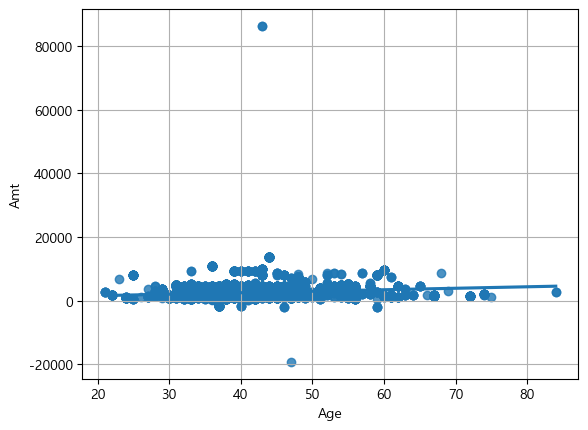

상관계수 : 0.14977096159244208, p-value : 1.7529399467461226e-35


In [45]:
numerical_numerical(check, 'Age','Amt')

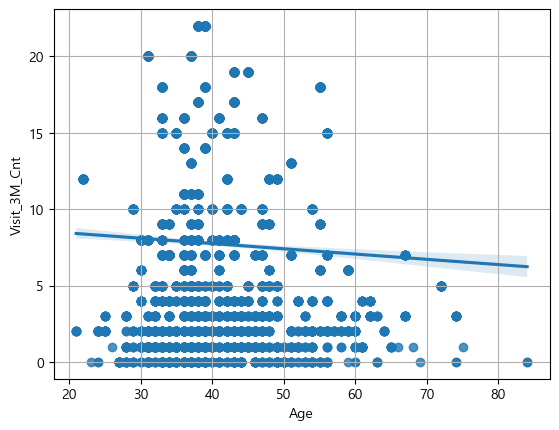

상관계수 : -0.046029413622845405, p-value : 0.0001440060568483712


In [46]:
numerical_numerical(check, 'Age','Visit_3M_Cnt')

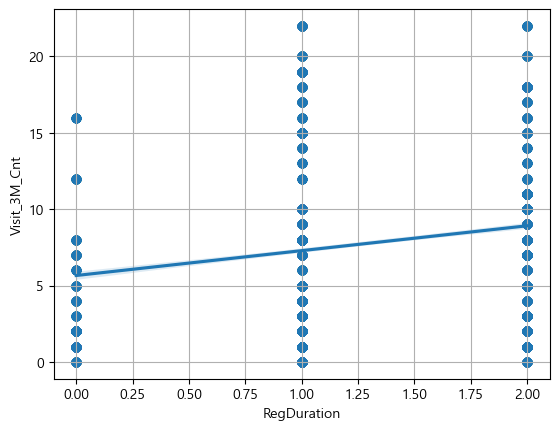

상관계수 : 0.18331734835530003, p-value : 1.4101089736120705e-52


In [47]:
numerical_numerical(check, 'RegDuration','Visit_3M_Cnt')

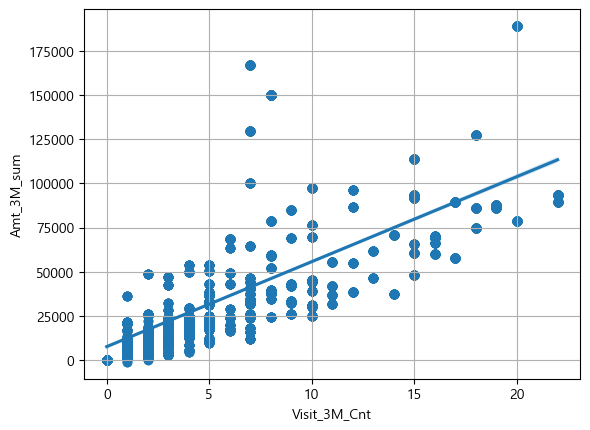

상관계수 : 0.7262101916713114, p-value : 0.0


In [48]:
numerical_numerical(check, 'Visit_3M_Cnt','Amt_3M_sum')

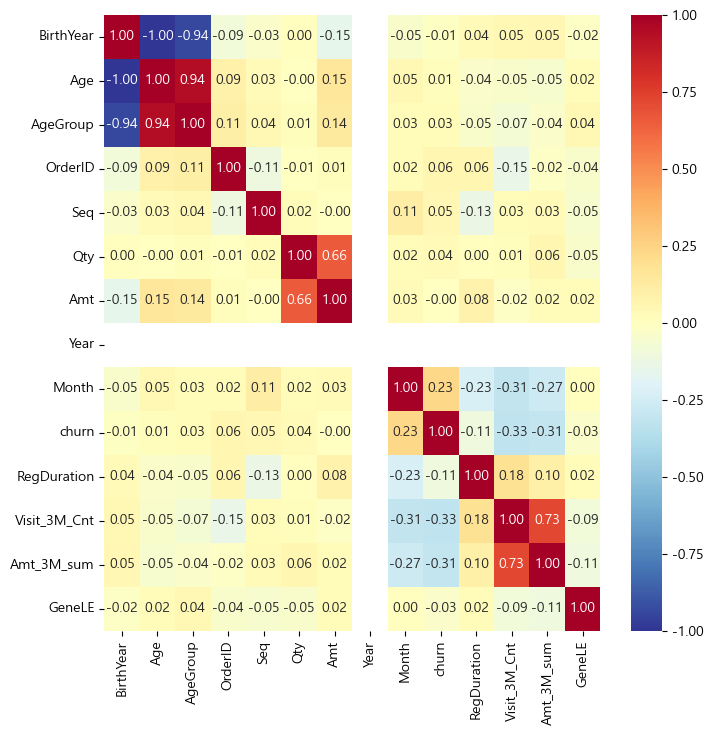

In [49]:
#check['한글'] = 1
numerical_numerical_hitmap(check)

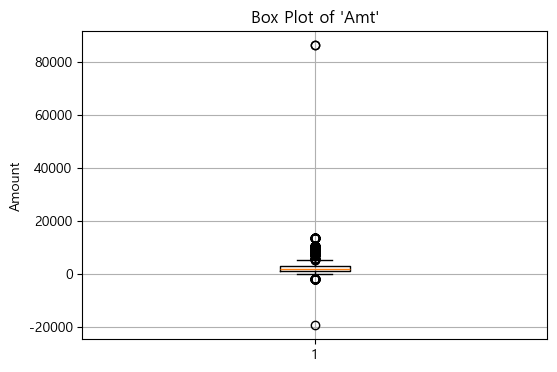

count     6815.000000
mean      2538.440059
std       2531.337220
min     -19250.000000
25%       1250.000000
50%       1850.000000
75%       2950.000000
max      86400.000000
Name: Amt, dtype: float64

In [79]:
# 구매금액 구간을 나눠서 이탈률을 구해보자 
# 구매 금액대를 범주로 나누어보자 

plt.figure(figsize=(6, 4))
plt.boxplot(check['Amt'])
plt.title("Box Plot of 'Amt'")
plt.ylabel('Amount')
plt.grid(True)
plt.show()

#
check['Amt'].describe()

C:\Users\User\AppData\Local\Temp\ipykernel_20760\2041835237.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = check.groupby('Amt_Category')['churn'].mean() *100


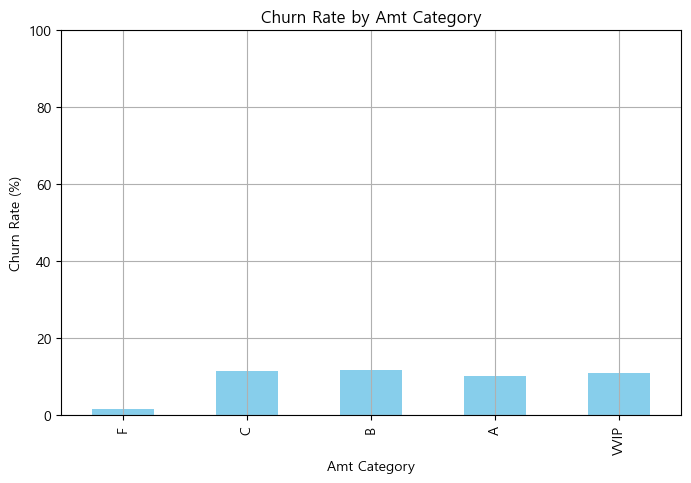

In [80]:
bins = [-float('inf'), 0, 1250, 1850, 2950, float('inf')]
labels = ['F', 'C', 'B', 'A', 'VVIP']
check['Amt_Category'] = pd.cut(check['Amt'], bins=bins,labels = labels )

#check.head()

churn_rate = check.groupby('Amt_Category')['churn'].mean() *100

# 이탈률 시각화
plt.figure(figsize=(8, 5))
churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Amt Category')
plt.xlabel('Amt Category')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()


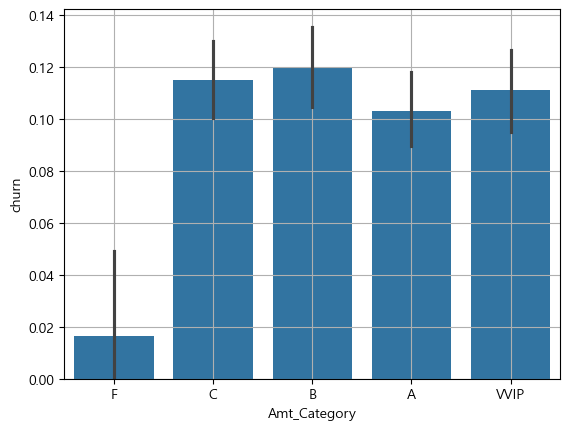

ANOVA 결과: F-statistic = nan, p-value = nan


c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [81]:
# 구매 금액 구간별 이탈율에는 차이가 정말 있는걸까? # 범주형 --> 연속형(t-test , Anova)

categorical_numerical(check , 'Amt_Category' ,'churn') 

# 원인

1. 샘플 크기 부족: 각 그룹의 샘플 크기가 너무 작아서 통계적 유의성을 평가하기에 충분하지 않을 때 발생할 수 있습니다.
2. 그룹 간 분산 차이 부족: 그룹 간의 실제 차이가 매우 작거나 없어서 검정 통계량(F 통계량)이 너무 작을 경우 이 오류가 발생할 수 있습니다.
3. 데이터 분포: 데이터가 정규 분포를 따르지 않거나, 이상치(outlier)가 많아 통계 검정이 부정확할 수 있습니다.

In [53]:
check.head()

,CustomerID,RegisterDate,Gender,BirthYear,Addr1,Addr2,Age,AgeGroup,OrderID,Seq,...,Amt,Year,Month,churn,RegDuration,Visit_3M_Cnt,Amt_3M_sum,Generation,GeneLE,Amt_Category
0,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,909,2016,7,0,2,15.0,47979.0,베이비부머,3,D
1,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,909,2016,7,0,2,15.0,47979.0,베이비부머,3,D
2,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,909,2016,7,0,2,15.0,47979.0,베이비부머,3,D
3,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,909,2016,7,0,2,15.0,47979.0,베이비부머,3,D
4,c328222,2014-09-25,F,1960,강원도,원주시,56,50,99,1,...,909,2016,7,0,2,15.0,47979.0,베이비부머,3,D


In [54]:
check.columns

Index(['CustomerID', 'RegisterDate', 'Gender', 'BirthYear', 'Addr1', 'Addr2',
       'Age', 'AgeGroup', 'OrderID', 'Seq', 'OrderDate', 'ProductID', 'Qty',
       'Amt', 'Year', 'Month', 'churn', 'RegDuration', 'Visit_3M_Cnt',
       'Amt_3M_sum', 'Generation', 'GeneLE', 'Amt_Category'],
      dtype='object')

In [55]:
# 데이터 3개를 pd.read_csv로 불러오기
customers = pd.read_csv('customers.csv')
sales = pd.read_csv('sales.csv')
products = pd.read_csv('products.csv')
print(customers.head())
print(sales.head())
print( products.head())
print(check.head())

check = pd.merge(check, products, on='ProductID', how='left')

print(check.columns)

  CustomerID RegisterDate Gender  BirthYear Addr1 Addr2
0    c328222   2014-09-25      F       1960   강원도   원주시
1    c281448   2013-06-18      F       1974   강원도   원주시
2    c038336   2003-10-10      F       1968   강원도   춘천시
3    c084237   2007-03-09      F       1982   강원도   강릉시
4    c162600   2010-06-14      F       1978   강원도   속초시
   OrderID  Seq   OrderDate ProductID  Qty   Amt CustomerID
0      107    2  2016-01-02  p1036481    2  2100    c150417
1       69    1  2016-01-02  p1152861    1  1091    c212716
2       69    7  2016-01-02  p1013161    1  2600    c212716
3       69    8  2016-01-02  p1005771    1  1650    c212716
4       69   11  2016-01-02  p1089531    1  2600    c212716
  ProductID ProductName Category SubCategory
0  p1052661         새우깡       간식          과자
1  p1054261       고구마스틱       간식          과자
2  p1097821          짱구       간식          과자
3  p1097831         감자칩       간식          과자
4  p1119071        뿌셔뿌셔       간식          과자
  CustomerID RegisterDate Gender  

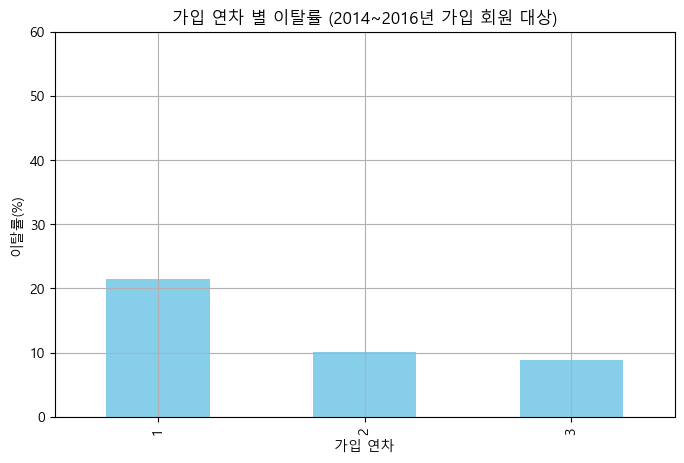

In [82]:
# 가입 연차별 이탈률  지난 실습에서 만든 파일이 2014년~ 2016년도 사이 회원가입한 고객들로 한정했기 때문 

# RegisterDate를 datetime 형식으로 변환
check['RegisterDate'] = pd.to_datetime(check['RegisterDate'])
# 기준년도 설정
base_year = 2017

# 가입 연차 계산
check['Join_Years'] = base_year - check['RegisterDate'].dt.year

churn_rate = check.groupby(by = 'Join_Years')['churn'].mean() *100

plt.figure(figsize=(8, 5))
churn_rate.plot(kind='bar', color='skyblue')
plt.title('가입 연차 별 이탈률 (2014~2016년 가입 회원 대상)')
plt.xlabel('가입 연차')
plt.ylabel('이탈률(%)')
plt.ylim(0, 60)
plt.grid(True)
plt.show()

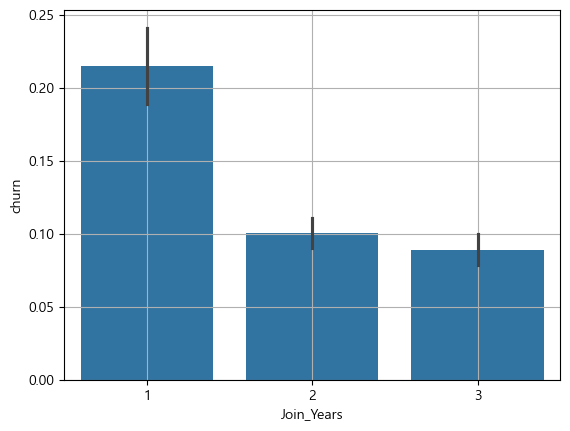

ANOVA 결과: F-statistic = nan, p-value = nan


c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [57]:
categorical_numerical(check , 'Join_Years' ,'churn') 

In [72]:
check['ProductName'].value_counts()
check['Category'].value_counts()

Category
채소     2252
유제품    1852
반찬류    1218
간식      830
과일      663
Name: count, dtype: int64

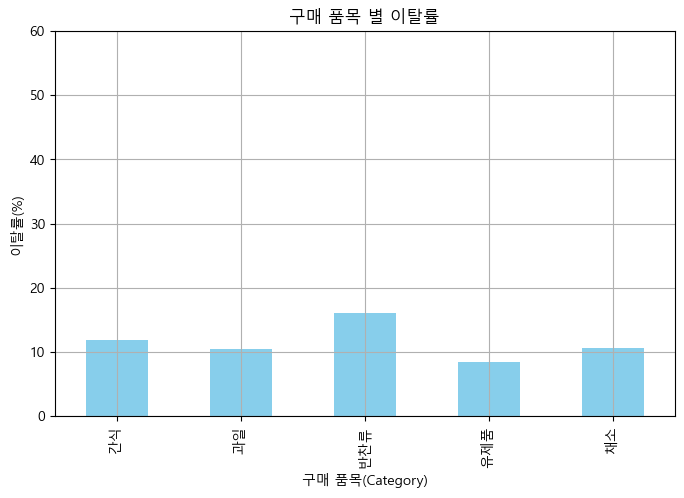

In [83]:
# 구매 품목별 이탈률 계산
churn_rate = check.groupby(by = 'Category')['churn'].mean() *100

plt.figure(figsize=(8, 5))
churn_rate.plot(kind='bar', color='skyblue')
plt.title('구매 품목 별 이탈률')
plt.xlabel('구매 품목(Category)')
plt.ylabel('이탈률(%)')
plt.ylim(0, 60)
plt.grid(True)
plt.show()

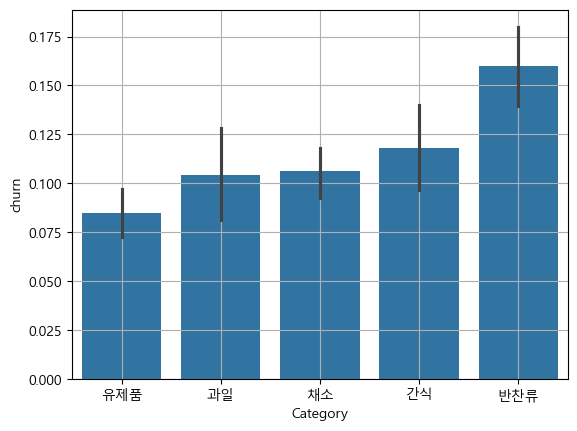

ANOVA 결과: F-statistic = nan, p-value = nan


c:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [60]:
categorical_numerical(check , 'Category' ,'churn') 
## 

토익 데이터 불러오기 

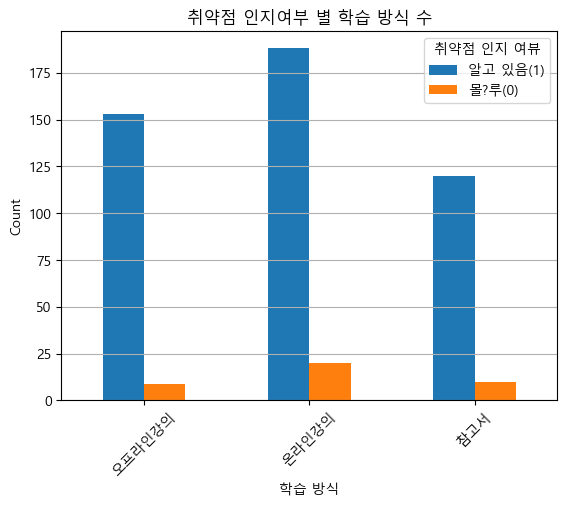

In [85]:
# 토익 데이터 (취약점 아냐 모르냐 여부에 따라   학습 컨텐츠 )
# 취약점 아는사람/ 모르는 사람의 학습방법 
# 취약점 아는사람/ 모르는 사람별 1~3회차 까지 추세 

toeic = pd.read_csv('data04_baseline.csv')
# 1. 취약점을 아는사람 , 모르는 사람 별 학습방법 

pivot_table = toeic.pivot_table(index='학습방법', columns='취약분야 인지 여부', aggfunc='size', fill_value=0)

# 피벗 테이블 그래프 그리기
pivot_table.plot(kind='bar', stacked=False)
plt.title('취약점 인지여부 별 학습 방식 수')
plt.xlabel('학습 방식')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='취약점 인지 여뷰', labels=['알고 있음(1)', '몰?루(0)'])
plt.grid(axis='y')
plt.show()


# 2. 취약점을 아는사람 모르는 사람 별 점수 추세 

toeic_know = toeic.loc[toeic['취약분야 인지 여부'] =='알고 있음']

toeic_unknow = toeic.loc[toeic['취약분야 인지 여부'] =='알고 있지 않음']

